# Importing Libraries

In [1]:
import numpy as np
import pandas as pd


# Importing Data

In [ ]:
#The data has been downloaded from https://www.kaggle.com/zalando-research/fashionmnist#fashion-mnist_test.csv

In [2]:
fashiontrain= pd.read_csv("fashion-mnist_train.csv")


In [3]:
fashiontest= pd.read_csv("fashion-mnist_test.csv")


In [4]:
fashiontrain.shape


(60000, 785)

In [5]:
fashiontest.shape


(10000, 785)

In [6]:
fashiontrain.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#I have reduced the size of the train and the test data to half as my computer was giving memory error with
#that original large set of the data. Sorry for the inconvenience!!

traindatas = fashiontrain.iloc[30000:60000,]
traindata=traindatas.drop(["label"], axis=1)
traindata.shape

(30000, 784)

In [8]:
testdatas = fashiontest.iloc[5000:10000,]
testdata=testdatas.drop(["label"],axis=1)
testdata.shape

(5000, 784)

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_train = kmeans.fit(traindata)
clusters = kmeans_train.predict(testdata)
kmeans_train.cluster_centers_.shape


(10, 784)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plotting

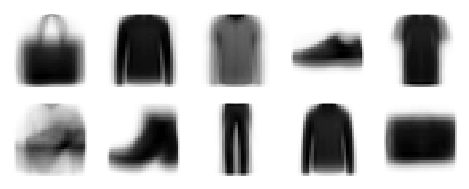

In [11]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
    

In [15]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(testdatas["label"][mask])[0]


In [16]:
#Accuracy is not that good
from sklearn.metrics import accuracy_score
accuracy_score(testdatas["label"], labels)


0.5766

# TSNE implementation

In [17]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='random', random_state=0)
traindata_proj = tsne.fit_transform(traindata)
testdata_proj = tsne.fit_transform(testdata)


In [18]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_train = kmeans.fit(traindata_proj)
clusters = kmeans_train.predict(testdata_proj)
kmeans_train.cluster_centers_.shape


(10, 2)

In [19]:
labels_proj = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels_proj[mask] = mode(testdatas["label"][mask])[0]

In [20]:
# The accuracy is a bit higher
accuracy_score(testdatas["label"], labels_proj)

0.6128

In [21]:
import seaborn as sns
import matplotlib
from sklearn.decomposition import PCA, RandomizedPCA
from sklearn.manifold import TSNE

sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'

ready


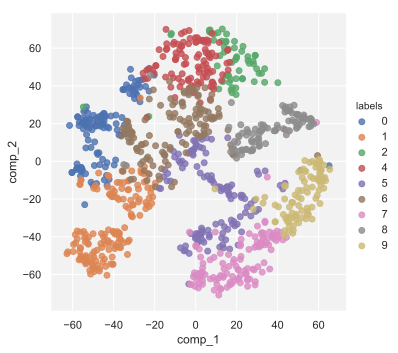

In [22]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(testdata_proj)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = labels
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj.sample(1000) ,fit_reg=False)
print("ready")